# Network Analysis - Exemplo Artigo MKT

In [ ]:
# https://stackoverflow.com/questions/21207872/construct-networkx-graph-from-pandas-dataframe

In [9]:
import pandas as pd
import scipy.sparse as sp
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
sna = {'Seevers':[9,2,5], 'Azhar':[2,2,1], 'Saffer':[1,4,1], 'Kurt':[2,4,1]}
#sna = {'Seevers':[1,1,1], 'Azhar':[1,1,1], 'Saffer':[1,1,1], 'Kurt':[1,1,1]}
col = ['Burt', 'Coleman', 'Nahapiet']

In [27]:
df = pd.DataFrame(sna, index = col)
df

,Seevers,Azhar,Saffer,Kurt
Burt,9,2,1,2
Coleman,2,2,4,4
Nahapiet,5,1,1,1


In [28]:
cols = df.columns
X = sp.csr_matrix(df.astype(int).values)
Xc = X.T * X  # multiply sparse matrix
Xc.setdiag(0)  # reset diagonal

In [29]:
# create dataframe from co-occurence matrix in dense format
df = pd.DataFrame(Xc.todense(), index=cols, columns=cols)

In [30]:
df = df.stack().reset_index()
df.columns = ['source', 'target', 'weight']

df = df[df['weight'] != 0]  # remove non-connected nodes

g = nx.from_pandas_edgelist(df, 'source', 'target', ['weight'])

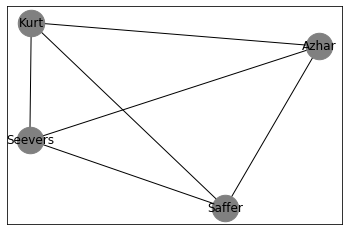

In [37]:
nx.draw_networkx(g, node_color = 'gray', node_size = 700)